In [ ]:
import pandas as pd
import yfinance as yf

In [2]:
aapl_df = pd.read_csv('../data/not-in-use/AAPL_FINANCIAL.csv')
print(aapl_df.head())

                        Date      Close  Label
0  2019-11-11 00:00:00-05:00  63.549580      0
1  2019-11-12 00:00:00-05:00  63.491405      1
2  2019-11-13 00:00:00-05:00  64.099770     -1
3  2019-11-14 00:00:00-05:00  63.656223      1
4  2019-11-15 00:00:00-05:00  64.412422      0


In [3]:
jnj_df = pd.read_csv('../data/not-in-use/JNJ_FINANCIAL.csv')
print(jnj_df.head())

                        Date       Close  Label
0  2019-11-11 00:00:00-05:00  115.011139      0
1  2019-11-12 00:00:00-05:00  114.462173      0
2  2019-11-13 00:00:00-05:00  114.392456      0
3  2019-11-14 00:00:00-05:00  114.122307      1
4  2019-11-15 00:00:00-05:00  117.590576     -1


In [4]:
aapl_df['SMA_20'] = aapl_df['Close'].rolling(window=20).mean()
jnj_df['SMA_20'] = jnj_df['Close'].rolling(window=20).mean()

In [5]:
aapl_df['EMA_20'] = aapl_df['Close'].ewm(span=20, adjust=False).mean()
jnj_df['EMA_20'] = jnj_df['Close'].ewm(span=20, adjust=False).mean()


In [6]:
short_ema = aapl_df['Close'].ewm(span=12, adjust=False).mean()
long_ema = aapl_df['Close'].ewm(span=26, adjust=False).mean()
aapl_df['MACD'] = short_ema - long_ema
aapl_df['Signal_Line'] = aapl_df['MACD'].ewm(span=9, adjust=False).mean()

short_ema = jnj_df['Close'].ewm(span=12, adjust=False).mean()
long_ema = jnj_df['Close'].ewm(span=26, adjust=False).mean()
jnj_df['MACD'] = short_ema - long_ema
jnj_df['Signal_Line'] = jnj_df['MACD'].ewm(span=9, adjust=False).mean()

In [7]:
window = 20
aapl_df['High_20'] = aapl_df['Close'].rolling(window=window).max()
aapl_df['Low_20'] = aapl_df['Close'].rolling(window=window).min()
aapl_df['Fib_23.6'] = aapl_df['Low_20'] + 0.236 * (aapl_df['High_20'] - aapl_df['Low_20'])
aapl_df['Fib_38.2'] = aapl_df['Low_20'] + 0.382 * (aapl_df['High_20'] - aapl_df['Low_20'])
aapl_df['Fib_61.8'] = aapl_df['Low_20'] + 0.618 * (aapl_df['High_20'] - aapl_df['Low_20'])

jnj_df['High_20'] = jnj_df['Close'].rolling(window=window).max()
jnj_df['Low_20'] = jnj_df['Close'].rolling(window=window).min()
jnj_df['Fib_23.6'] = jnj_df['Low_20'] + 0.236 * (jnj_df['High_20'] - jnj_df['Low_20'])
jnj_df['Fib_38.2'] = jnj_df['Low_20'] + 0.382 * (jnj_df['High_20'] - jnj_df['Low_20'])
jnj_df['Fib_61.8'] = jnj_df['Low_20'] + 0.618 * (jnj_df['High_20'] - jnj_df['Low_20'])

In [8]:
low_14 = aapl_df['Close'].rolling(14).min()
high_14 = aapl_df['Close'].rolling(14).max()
aapl_df['%K'] = 100 * ((aapl_df['Close'] - low_14) / (high_14 - low_14))
aapl_df['%D'] = aapl_df['%K'].rolling(3).mean()  # %D is a 3-day SMA of %K


low_14 = jnj_df['Close'].rolling(14).min()
high_14 = jnj_df['Close'].rolling(14).max()
jnj_df['%K'] = 100 * ((jnj_df['Close'] - low_14) / (high_14 - low_14))
jnj_df['%D'] = jnj_df['%K'].rolling(3).mean()  # %D is a 3-day SMA of %K

In [9]:
aapl_df['BB_Mid'] = aapl_df['Close'].rolling(window=20).mean()
aapl_df['BB_Upper'] = aapl_df['BB_Mid'] + (aapl_df['Close'].rolling(window=20).std() * 2)
aapl_df['BB_Lower'] = aapl_df['BB_Mid'] - (aapl_df['Close'].rolling(window=20).std() * 2)

jnj_df['BB_Mid'] = jnj_df['Close'].rolling(window=20).mean()
jnj_df['BB_Upper'] = jnj_df['BB_Mid'] + (jnj_df['Close'].rolling(window=20).std() * 2)
jnj_df['BB_Lower'] = jnj_df['BB_Mid'] - (jnj_df['Close'].rolling(window=20).std() * 2)

In [10]:
# RSI with a window of 14 days
delta = aapl_df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
aapl_df['RSI'] = 100 - (100 / (1 + rs))

# RSI with a window of 14 days
delta = jnj_df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
jnj_df['RSI'] = 100 - (100 / (1 + rs))

In [11]:
# Standard Deviation over a window of 20 days
aapl_df['Std_Dev_20'] = aapl_df['Close'].rolling(window=20).std()

# Standard Deviation over a window of 20 days
jnj_df['Std_Dev_20'] = jnj_df['Close'].rolling(window=20).std()


In [12]:
print(aapl_df.columns)
print(jnj_df.columns)

Index(['Date', 'Close', 'Label', 'SMA_20', 'EMA_20', 'MACD', 'Signal_Line',
       'High_20', 'Low_20', 'Fib_23.6', 'Fib_38.2', 'Fib_61.8', '%K', '%D',
       'BB_Mid', 'BB_Upper', 'BB_Lower', 'RSI', 'Std_Dev_20'],
      dtype='object')
Index(['Date', 'Close', 'Label', 'SMA_20', 'EMA_20', 'MACD', 'Signal_Line',
       'High_20', 'Low_20', 'Fib_23.6', 'Fib_38.2', 'Fib_61.8', '%K', '%D',
       'BB_Mid', 'BB_Upper', 'BB_Lower', 'RSI', 'Std_Dev_20'],
      dtype='object')


In [13]:
# aapl_df.to_csv('../data/AAPL_FULL_FINANCIAL.csv')

In [14]:
# jnj_df.to_csv('../data/JNJ_FULL_FINANCIAL.csv')

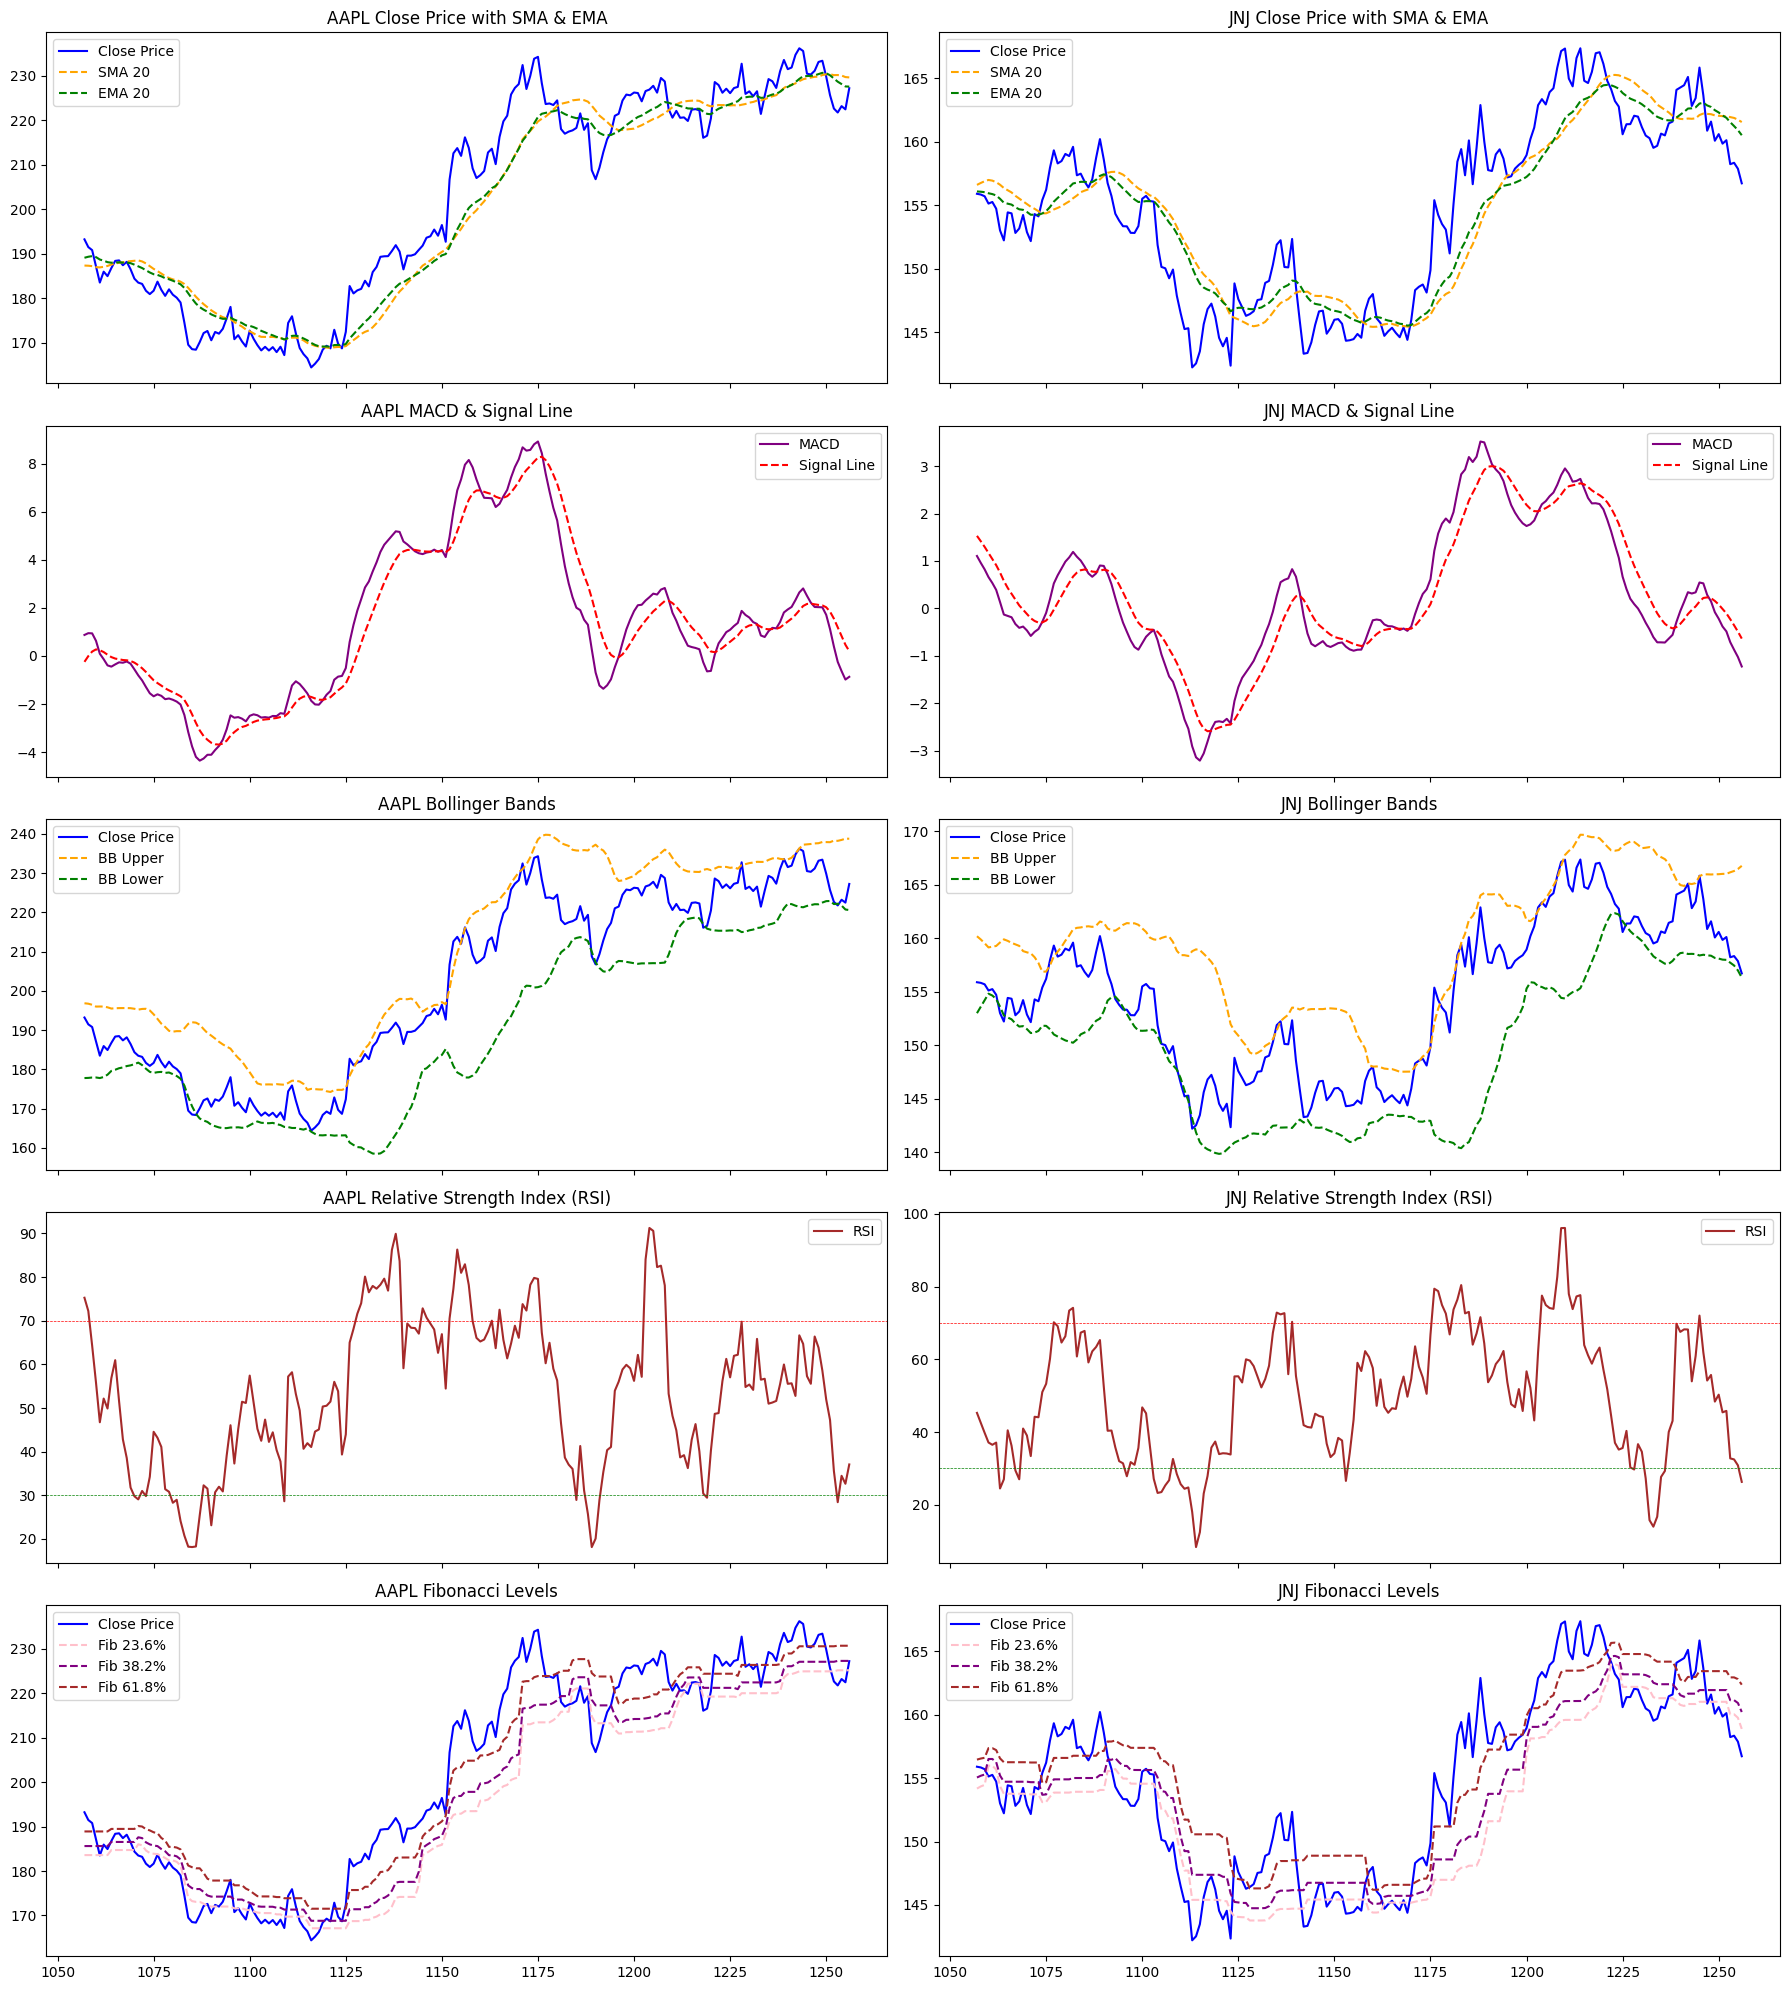

In [18]:
import matplotlib.pyplot as plt

def plot_stock_indicators_side_by_side(aapl_data, jnj_data, max_points=200):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20), sharex=True)

    # Select the most recent data points for each stock
    aapl_data = aapl_data[-max_points:]
    jnj_data = jnj_data[-max_points:]

    # Titles for each indicator
    titles = ["Close Price with SMA & EMA", "MACD & Signal Line", "Bollinger Bands",
              "Relative Strength Index (RSI)", "Fibonacci Levels"]

    # Plot Close Price, SMA, and EMA
    axes[0, 0].plot(aapl_data.index, aapl_data['Close'], label='Close Price', color='blue')
    axes[0, 0].plot(aapl_data.index, aapl_data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
    axes[0, 0].plot(aapl_data.index, aapl_data['EMA_20'], label='EMA 20', color='green', linestyle='--')
    axes[0, 0].set_title(f"AAPL {titles[0]}")
    axes[0, 0].legend()
    
    axes[0, 1].plot(jnj_data.index, jnj_data['Close'], label='Close Price', color='blue')
    axes[0, 1].plot(jnj_data.index, jnj_data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
    axes[0, 1].plot(jnj_data.index, jnj_data['EMA_20'], label='EMA 20', color='green', linestyle='--')
    axes[0, 1].set_title(f"JNJ {titles[0]}")
    axes[0, 1].legend()

    # Plot MACD and Signal Line
    axes[1, 0].plot(aapl_data.index, aapl_data['MACD'], label='MACD', color='purple')
    axes[1, 0].plot(aapl_data.index, aapl_data['Signal_Line'], label='Signal Line', color='red', linestyle='--')
    axes[1, 0].set_title(f"AAPL {titles[1]}")
    axes[1, 0].legend()

    axes[1, 1].plot(jnj_data.index, jnj_data['MACD'], label='MACD', color='purple')
    axes[1, 1].plot(jnj_data.index, jnj_data['Signal_Line'], label='Signal Line', color='red', linestyle='--')
    axes[1, 1].set_title(f"JNJ {titles[1]}")
    axes[1, 1].legend()

    # Plot Bollinger Bands
    axes[2, 0].plot(aapl_data.index, aapl_data['Close'], label='Close Price', color='blue')
    axes[2, 0].plot(aapl_data.index, aapl_data['BB_Upper'], label='BB Upper', color='orange', linestyle='--')
    axes[2, 0].plot(aapl_data.index, aapl_data['BB_Lower'], label='BB Lower', color='green', linestyle='--')
    axes[2, 0].set_title(f"AAPL {titles[2]}")
    axes[2, 0].legend()

    axes[2, 1].plot(jnj_data.index, jnj_data['Close'], label='Close Price', color='blue')
    axes[2, 1].plot(jnj_data.index, jnj_data['BB_Upper'], label='BB Upper', color='orange', linestyle='--')
    axes[2, 1].plot(jnj_data.index, jnj_data['BB_Lower'], label='BB Lower', color='green', linestyle='--')
    axes[2, 1].set_title(f"JNJ {titles[2]}")
    axes[2, 1].legend()

    # Plot RSI
    axes[3, 0].plot(aapl_data.index, aapl_data['RSI'], label='RSI', color='brown')
    axes[3, 0].axhline(70, color='red', linestyle='--', linewidth=0.5)
    axes[3, 0].axhline(30, color='green', linestyle='--', linewidth=0.5)
    axes[3, 0].set_title(f"AAPL {titles[3]}")
    axes[3, 0].legend()

    axes[3, 1].plot(jnj_data.index, jnj_data['RSI'], label='RSI', color='brown')
    axes[3, 1].axhline(70, color='red', linestyle='--', linewidth=0.5)
    axes[3, 1].axhline(30, color='green', linestyle='--', linewidth=0.5)
    axes[3, 1].set_title(f"JNJ {titles[3]}")
    axes[3, 1].legend()

    # Plot Fibonacci Levels
    axes[4, 0].plot(aapl_data.index, aapl_data['Close'], label='Close Price', color='blue')
    axes[4, 0].plot(aapl_data.index, aapl_data['Fib_23.6'], label='Fib 23.6%', color='pink', linestyle='--')
    axes[4, 0].plot(aapl_data.index, aapl_data['Fib_38.2'], label='Fib 38.2%', color='purple', linestyle='--')
    axes[4, 0].plot(aapl_data.index, aapl_data['Fib_61.8'], label='Fib 61.8%', color='brown', linestyle='--')
    axes[4, 0].set_title(f"AAPL {titles[4]}")
    axes[4, 0].legend()

    axes[4, 1].plot(jnj_data.index, jnj_data['Close'], label='Close Price', color='blue')
    axes[4, 1].plot(jnj_data.index, jnj_data['Fib_23.6'], label='Fib 23.6%', color='pink', linestyle='--')
    axes[4, 1].plot(jnj_data.index, jnj_data['Fib_38.2'], label='Fib 38.2%', color='purple', linestyle='--')
    axes[4, 1].plot(jnj_data.index, jnj_data['Fib_61.8'], label='Fib 61.8%', color='brown', linestyle='--')
    axes[4, 1].set_title(f"JNJ {titles[4]}")
    axes[4, 1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot the indicators side-by-side for AAPL and JNJ
plot_stock_indicators_side_by_side(aapl_df, jnj_df)
